- Treinando o um programa para reconhecer a espécie de uma flor de Iris a partir das medidas, usando modelos estatísticos.

# Pré Requisitos

In [10]:
pip install scipy

In [11]:
pip install scikit-learn

# Importando os Dados

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

### Observações

In [13]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
print(type(iris.data))

<class 'numpy.ndarray'>


### Target (resultados)

In [15]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
# Shape das observações
print(iris.data.shape)

(150, 4)


In [18]:
# shape do target
print(iris.target.shape)

(150,)


# Aplicação do modelo KNN


In [19]:
x = iris.data
y = iris.target

In [20]:
# Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

### Treinando o modelo

In [22]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

### Previsão com o modelo

In [23]:
knn.predict([[4.7,3.2,1.3,0.2]])

array([0])

In [24]:
species = knn.predict([[6.4,3.1,5.5,1.8]])
print(iris.target_names[species])

['virginica']


### Avaliação do modelo

In [25]:
# Separando os dados em dois grupos
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [26]:
# retreinando
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
# Prevendo
previsoes = knn.predict(x_test)
print(previsoes)

[2 2 1 1 1 1 2 0 2 0 2 0 1 2 2 2 1 1 0 0 0 1 2 1 0 2 2 0 2 1 0 0 1 0 0 2 0
 0]


In [29]:
from sklearn import metrics
acertos = metrics.accuracy_score(y_test, previsoes)
print(acertos)

0.9473684210526315


94% de acerto


# Análise de performance do modelo e escolha do valor de K

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
valores_performance = {}
k = 1

while k <= 25:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  previsoes = knn.predict(x_test)
  acertos = metrics.accuracy_score(y_test,previsoes)
  valores_performance[k] = round(acertos,4)
  k += 1

print(valores_performance)

{1: 0.8947, 2: 0.8947, 3: 0.8947, 4: 0.8947, 5: 0.9211, 6: 0.9211, 7: 0.9211, 8: 0.9474, 9: 0.9211, 10: 0.9211, 11: 0.9211, 12: 0.9474, 13: 0.9211, 14: 0.9474, 15: 0.9211, 16: 0.9474, 17: 0.9474, 18: 0.9474, 19: 0.9211, 20: 0.9474, 21: 0.9211, 22: 0.9211, 23: 0.9211, 24: 0.8947, 25: 0.8947}


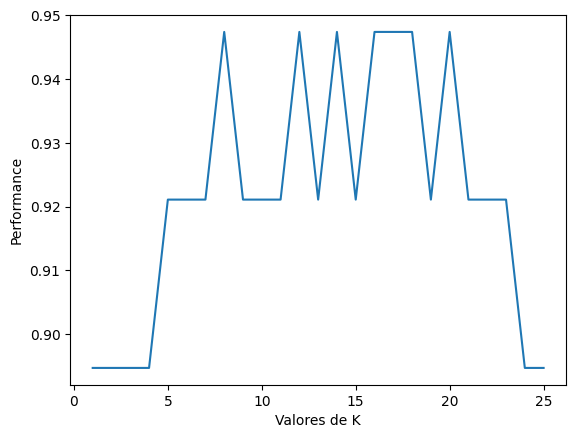

In [38]:
# visualizando
import matplotlib.pyplot as plt

plt.plot(list(valores_performance.keys()), list(valores_performance.values()))
plt.xlabel('Valores de K')
plt.ylabel('Performance')
plt.show()

Muitos valores de K tiveram um bom desempenho.

### Aplicando uma regressão logística

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', multi_class='ovr')
logreg.fit(x_train,y_train)
previsoes_logreg = logreg.predict(x_test)
acertos_logreg = metrics.accuracy_score(y_test,previsoes_logreg)
print(acertos_logreg)

0.868421052631579


O valor do KNN é mais alto.